In [ ]:
# %pip install pandas
# %pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv('stepCount_Data.csv')
data_frame.head()

In [ ]:
plt.figure(figsize=(18, 15))

plt.subplot(3, 1, 1)
plt.plot(data_frame['Time (s)'], data_frame['Linear Acceleration x (m/s^2)'])
plt.grid()
plt.title('Acceleration x')
plt.axis([0, 35, -5, 5])

plt.subplot(3, 1, 2)
plt.plot(data_frame['Time (s)'], data_frame['Linear Acceleration y (m/s^2)'])
plt.grid()
plt.title('Acceleration y')
plt.axis([0, 35, -5, 5])

plt.subplot(3, 1, 3)
plt.plot(data_frame['Time (s)'], data_frame['Linear Acceleration z (m/s^2)'])   
plt.grid()
plt.title('Acceleration z')
plt.axis([0, 35, -6, 10])

plt.show()

In [58]:
#Define Filter functions
#scipy is a library for scientific computing

from scipy.signal import butter, filtfilt 
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #get filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #get filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

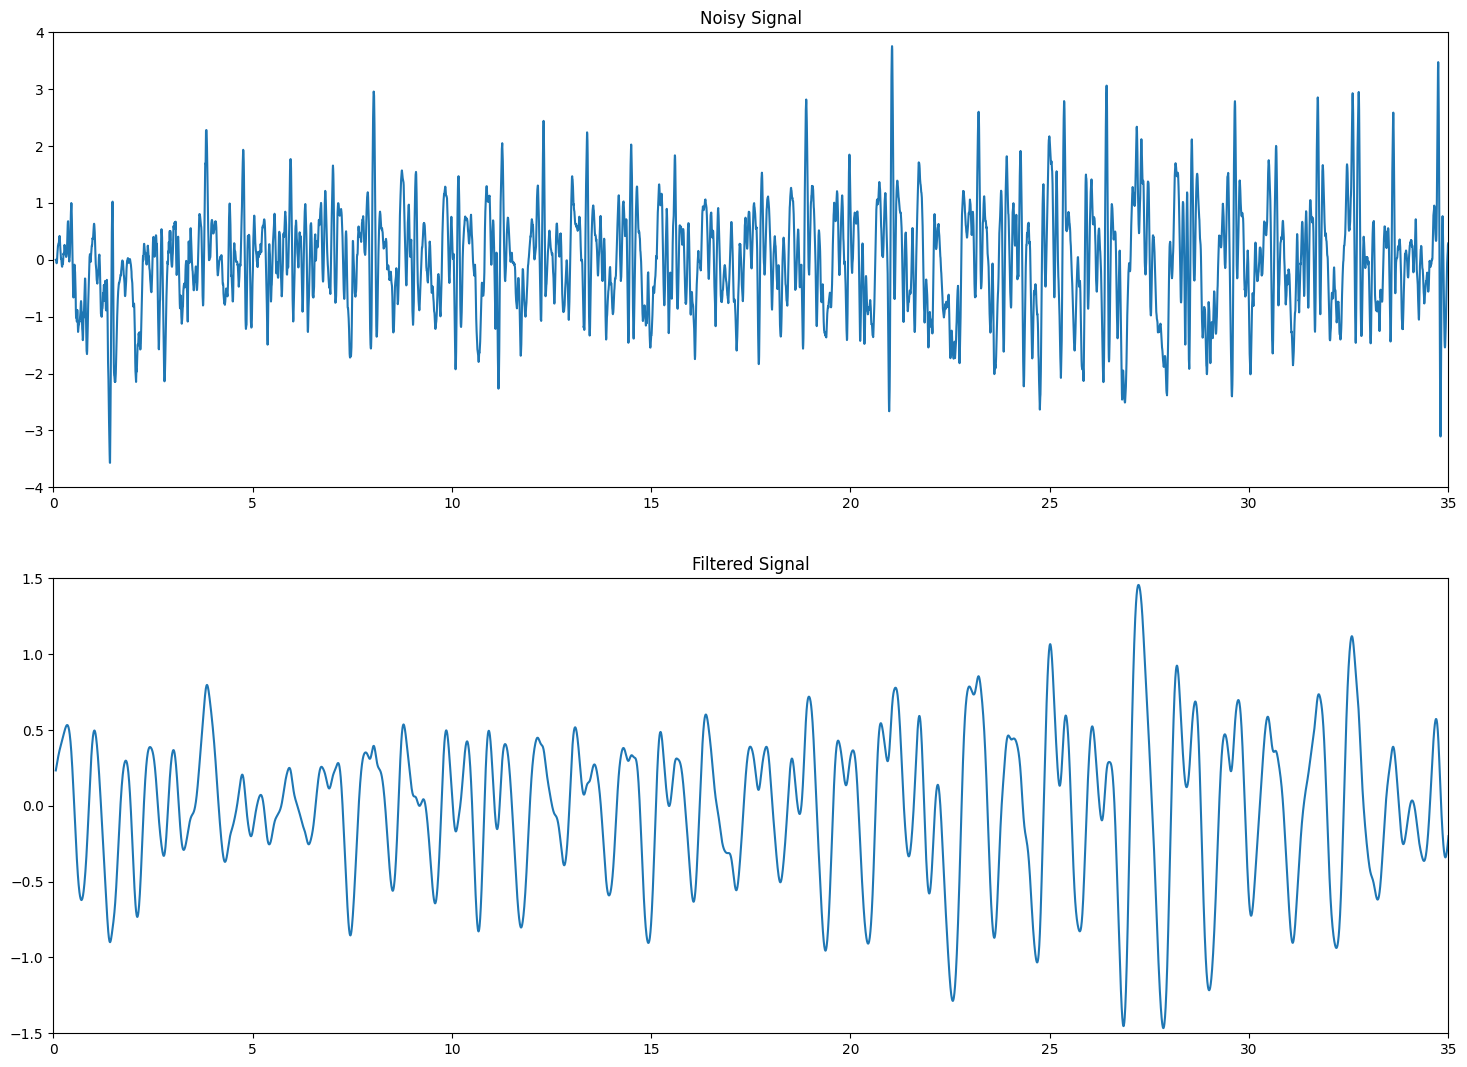

The number of steps is: 174.5


In [61]:
#filter the data
noisy_signal = data_frame['Linear Acceleration x (m/s^2)']
time = data_frame['Time (s)']
order = 2
dt = (time[len(time)-1] - time[0]) / len(time) #Time difference between each sample also called sampling interval
fs = 1/dt #Sampling rate
nyq = 0.5 * fs #Nyquist frequency
cutoff_H = 1/5 #Highpass cut-off
cutoff_L = 1/0.5 #Lowpass cut-off

#After this filtering, we ll have only friquencies between 0.5 and 5 Hz
lowpass_filtred = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filtred, cutoff_H, fs, nyq, order) #filter out low frequencies

plt.figure(figsize=(18, 13))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal)
plt.title('Noisy Signal')
plt.axis([0, 35, -4, 4])
plt.subplot(2,1,2)
plt.plot(time, final_signal)
plt.axis([0, 35, -1.5, 1.5])
plt.title('Filtered Signal')
plt.show()

stepdata = final_signal
steps = 0
for i in range(stepdata.shape[0] - 1):
    if stepdata[i] / stepdata[i+1] < 0:
        steps += 0.5
print('The number of steps is:', steps)